Food Sale Predictions

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display="diagram")

In [244]:
csv = "/content/sales_predictions.csv"
#"df" is used for data analysis
df = pd.read_csv(csv)
#"pred_sales_df" is used for predicting sales via machine learning 
pred_sales_df = pd.read_csv(csv)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [245]:
len(df)

8523

In [246]:
len(df.columns)

12

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [248]:
df.duplicated().sum()

0

In [249]:
miss_values = df.isna().sum()
miss_values[miss_values>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [250]:
df["Outlet_Size"].fillna("Medium", inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [251]:
df["Item_Weight"].fillna(df["Item_Weight"].median(), inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [252]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [253]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [254]:
df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [255]:
df["Item_Weight"].min()

4.555

In [256]:
df["Item_Weight"].max()

21.35

In [257]:
df["Item_Weight"].mean()

12.813419570574444

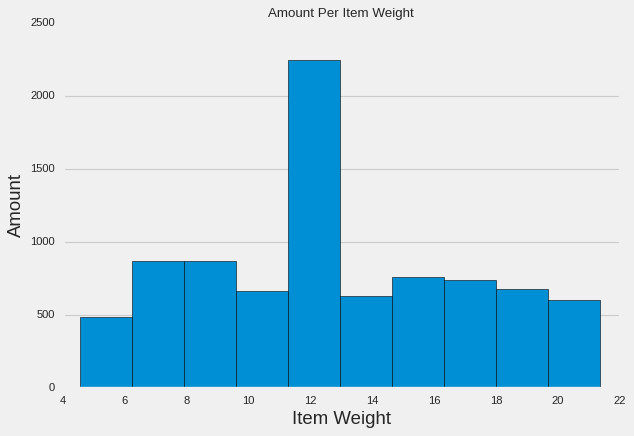

In [258]:
df["Item_Weight"].hist(ec="black");
plt.style.use("seaborn");
plt.ylim(bottom=0, top=2500);
plt.ylabel("Amount");
plt.xlabel("Item Weight");
plt.title("Amount Per Item Weight");
plt.grid(axis="x");
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


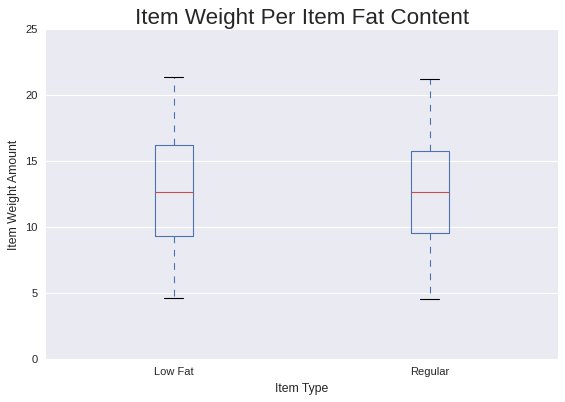

In [259]:
df.boxplot(column="Item_Weight", by="Item_Fat_Content");
plt.style.use("fivethirtyeight");
plt.title("");
plt.suptitle("");
plt.ylim(bottom=0, top=25);
plt.ylabel("Item Weight Amount");
plt.xlabel("Item Type");
plt.title("Item Weight Per Item Fat Content");
plt.grid(axis="x");
plt.show()

In [260]:
df["Item_Visibility"].min()

0.0

In [261]:
df["Item_Visibility"].max()

0.328390948

In [262]:
df["Item_Visibility"].mean()

0.06613202877895127

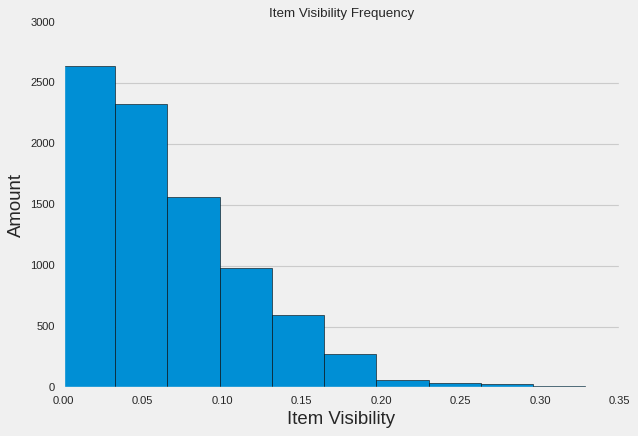

In [263]:
df["Item_Visibility"].hist(ec="black");
plt.style.use("seaborn");
plt.ylim(bottom=0, top=3000);
plt.ylabel("Amount");
plt.xlabel("Item Visibility");
plt.title("Item Visibility Frequency");
plt.grid(axis="x");
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


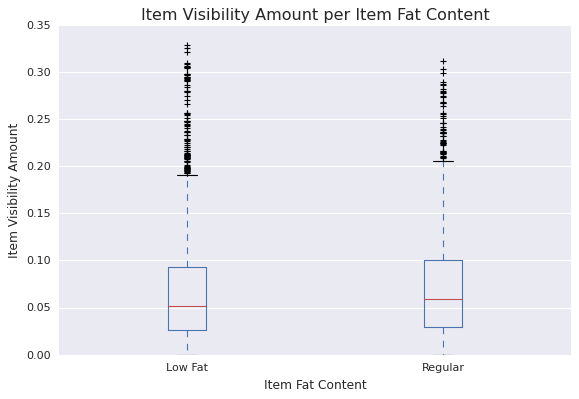

In [264]:
df.boxplot(column="Item_Visibility", by="Item_Fat_Content");
plt.style.use("classic");
plt.ylim(bottom=0, top=0.35);
plt.ylabel("Item Visibility Amount");
plt.xlabel("Item Fat Content");
plt.title("Item Visibility Amount per Item Fat Content");
plt.suptitle("");
plt.grid(axis="x");
plt.show()

In [265]:
df["Item_Outlet_Sales"].min()

33.29

In [266]:
df["Item_Outlet_Sales"].max()

13086.9648

In [267]:
df["Item_Outlet_Sales"].mean()

2181.2889135750365

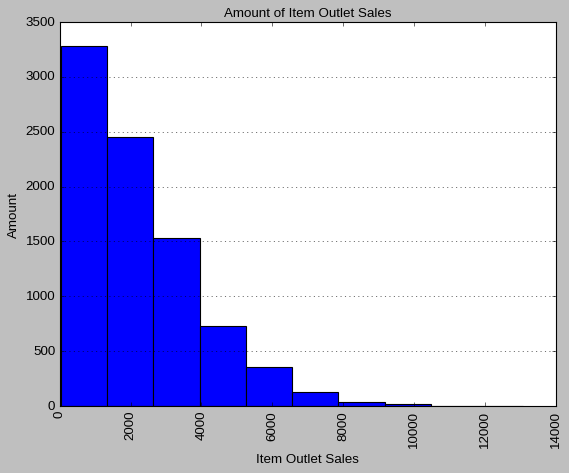

In [268]:
df["Item_Outlet_Sales"].hist(ec="black");
plt.style.use("seaborn");
plt.ylim(bottom=0, top=3500);
plt.ylabel("Amount");
plt.xlabel("Item Outlet Sales");
plt.xticks(rotation=90);
plt.title("Amount of Item Outlet Sales");
plt.grid(axis="x");
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


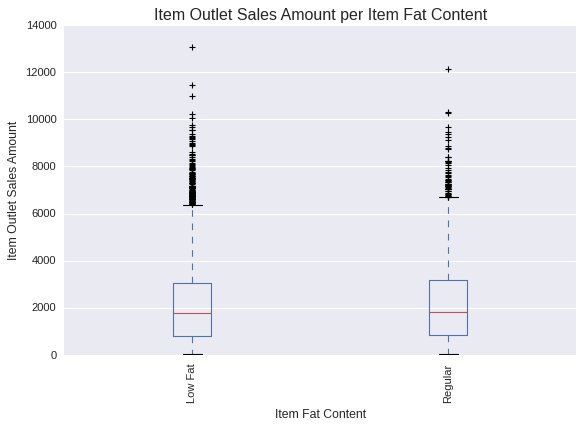

In [269]:
df.boxplot(column="Item_Outlet_Sales", by="Item_Fat_Content");
plt.style.use("ggplot");
plt.suptitle("");
plt.ylabel("Item Outlet Sales Amount");
plt.xlabel("Item Fat Content");
plt.xticks(rotation=90);
plt.title("Item Outlet Sales Amount per Item Fat Content");
plt.grid(axis="x");
plt.show()

In [270]:
df["Item_MRP"].min()

31.29

In [271]:
df["Item_MRP"].max()

266.8884

In [272]:
df["Item_MRP"].mean()

140.9927819781768

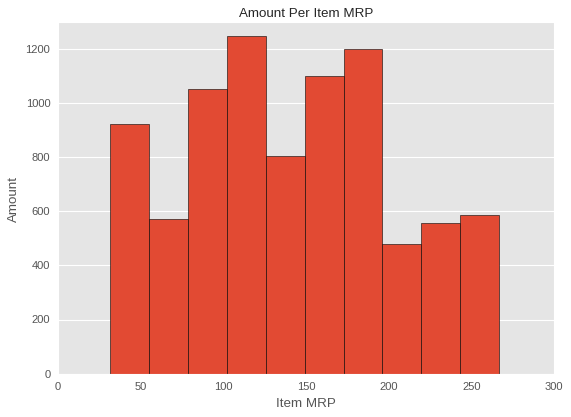

In [273]:
df["Item_MRP"].hist(ec="black");
plt.style.use("seaborn");
plt.xlim(left=0,right=300);
plt.ylim(bottom=0, top=1300);
plt.ylabel("Amount");
plt.xlabel("Item MRP");
plt.title("Amount Per Item MRP");
plt.grid(axis="x");
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


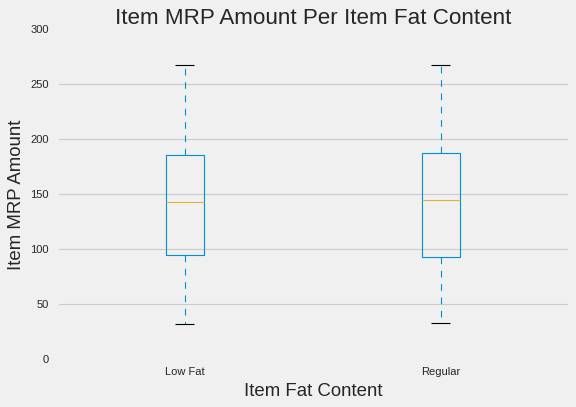

In [274]:
plt.style.use("fivethirtyeight");
df.boxplot(column="Item_MRP", by="Item_Fat_Content");
plt.ylim(bottom=0, top=300);
plt.suptitle("");
plt.ylabel("Item MRP Amount");
plt.xlabel("Item Fat Content");
plt.title("Item MRP Amount Per Item Fat Content");
plt.grid(axis="x");
plt.show()

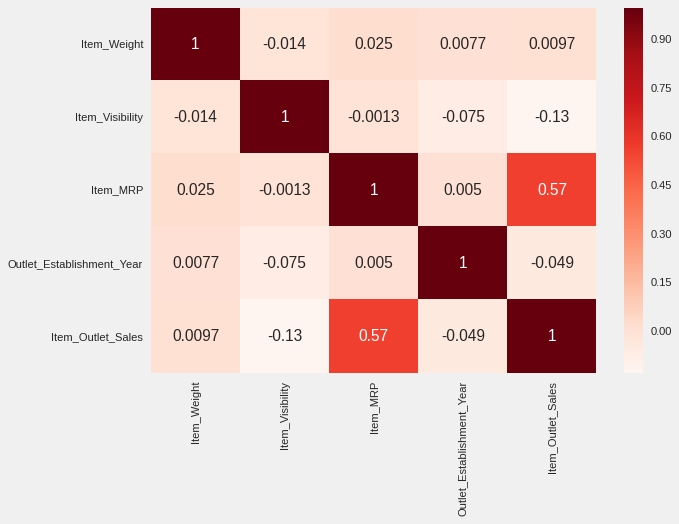

In [275]:
sns.heatmap(df.corr(), cmap ="Reds", annot=True);

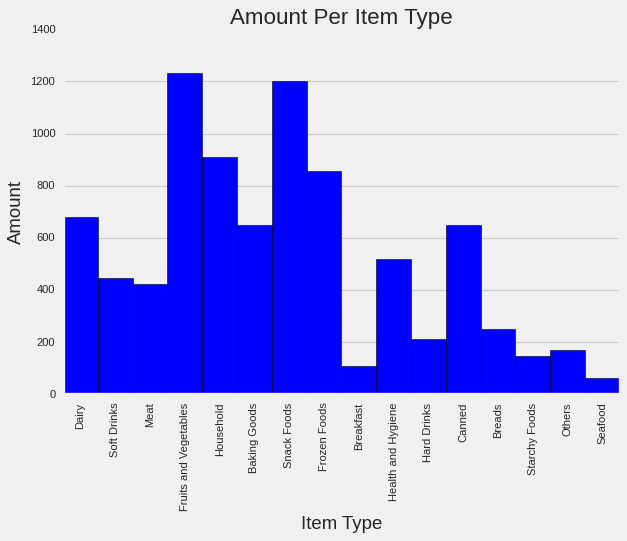

In [276]:
plt.hist(df["Item_Type"], bins=np.arange(17)-0.5, color="blue", ec="black");
plt.ylim(bottom=0, top=1400);
plt.ylabel("Amount");
plt.xlabel("Item Type");
plt.xticks(rotation=90);
plt.title("Amount Per Item Type");
plt.grid(axis="x");
plt.show()

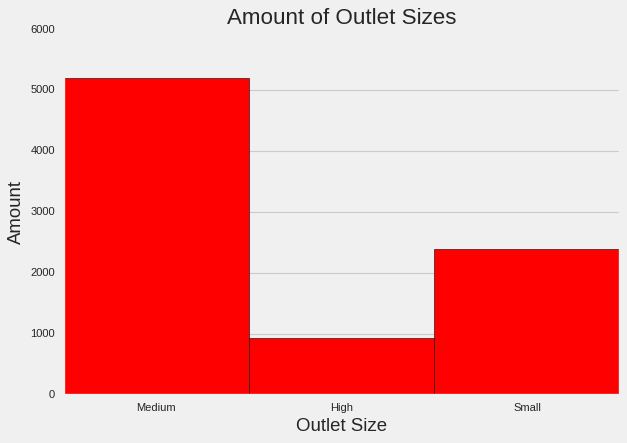

In [277]:
plt.hist(df["Outlet_Size"], bins=np.arange(4)-0.5, color="red", ec="black");
plt.ylim(bottom=0, top=6000);
plt.ylabel("Amount");
plt.xlabel("Outlet Size");
plt.title("Amount of Outlet Sizes");
plt.grid(axis="x");
plt.show()

In [278]:
pred_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [279]:
pred_sales_df = pred_sales_df.drop(columns="Item_Identifier")
pred_sales_df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)
pred_sales_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [280]:
#Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column 
#as your target and the rest of the relevant variables as your features matrix.
target = "Item_Outlet_Sales"
X = pred_sales_df.drop(columns=target)
y = pred_sales_df[target]

In [281]:
#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [282]:
#Create a preprocessing object to prepare the dataset for Machine Learning
#Instantiate Transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
mean_imputer = SimpleImputer(strategy="mean")
freq_imputer = SimpleImputer(strategy="most_frequent")

In [283]:
#Create Pipeline for Numerical and Categorical Data
num_pipeline = make_pipeline(mean_imputer, scaler)
ord_nom_pipeline = make_pipeline(freq_imputer, ohe)

In [284]:
#Create Tuples to pair Pipelines with Selected Columns
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

num_tuple = (num_pipeline, num_selector)
ord_nom_tuple = (ord_nom_pipeline, cat_selector)

In [285]:
#Instantiate the Column Transformer
preprocessor = make_column_transformer(ord_nom_tuple,
                                       num_tuple,
                                       remainder="passthrough")

In [286]:
#Fit the Column Transformer on training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8041f1090>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8041f1bd0>)])

In [287]:
#Transform the training data and testing data, then check the results
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed

array([[ 1.        ,  0.        ,  0.        , ..., -0.71277507,
         1.82810922,  1.32784893],
       [ 0.        ,  1.        ,  0.        , ..., -1.29105225,
         0.60336888,  1.32784893],
       [ 0.        ,  1.        ,  0.        , ...,  1.81331864,
         0.24454056,  0.13618724],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.92052713,
         1.52302674,  0.49368575],
       [ 1.        ,  0.        ,  0.        , ..., -0.2277552 ,
        -0.38377708,  1.0895166 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.95867683,
        -0.73836105, -0.10214509]])